### Setup

In [1]:
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\bergermann\.julia\registries\General.toml`


    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`


    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`


    Updating `C:\Users\bergermann\.julia\environments\v1.9\Project.toml`
  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`
    Updating `C:\Users\bergermann\.julia\environments\v1.9\Manifest.toml`


  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`


Precompiling project...


  ✓ Dragoon
  1 dependency successfully precompiled in 14 seconds. 152 already precompiled.


In [2]:
using Dragoon
using Plots
# using Dates

In [3]:
n = 20

initdist = findpeak(22.025e9,n)

freqs = genFreqs(22.025e9,50e6; length=50) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

booster = AnalyticalBooster(initdist)

hist = initHist(booster,10000,freqs,ObjAnalytical)
;

Objective Value: -243.3, Timestamp: 0000-01-01T00:00:00


In [4]:
T = collect(range(100; length=1001,stop=0))

trace = simulatedAnnealing(booster,hist,freqs,
            T,100e-6,
            ObjAnalytical,
            UnstuckDont;
            maxiter=Int(1e6),
            showtrace=true,
            showevery=100,
            unstuckisiter=true,
            traceevery=1,
            resettimer=true)
;

Iter: 100, timestamp: 24 seconds
Iter finished. Objective value current:  -1700.566
               Objective value solution: -1700.566
               Temperature:              90.1



Iter: 200, timestamp: 53 seconds
Iter finished. Objective value current:  -4492.164
               Objective value solution: -4492.164
               Temperature:              80.1

Iter: 300, timestamp: 

1 minute, 19 seconds
Iter finished. Objective value current:  -8769.083
               Objective value solution: -8769.083
               Temperature:              70.1



Iter: 400, timestamp: 1 minute, 52 seconds
Iter finished. Objective value current:  -13189.439
               Objective value solution: -13189.439
               Temperature:              60.1

Iter: 500, timestamp: 2 minutes, 21 seconds
Iter finished. Objective value current:  -13664.988
               Objective value solution: -13664.988
               Temperature:              50.1



Iter: 600, timestamp: 2 minutes, 56 seconds
Iter finished. Objective value current:  -13738.166
               Objective value solution: -13738.166
               Temperature:              40.1



Iter: 700, timestamp: 3 minutes, 27 seconds
Iter finished. Objective value current:  -13731.04
               Objective value solution: -13741.389
               Temperature:              30.1

Iter: 800, timestamp: 3 minutes, 59 seconds
Iter finished. Objective value current:  -13741.436
               Objective value solution: -13741.436
               Temperature:              20.1



Iter: 900, timestamp: 4 minutes, 34 seconds
Iter finished. Objective value current:  -13734.243
               Objective value solution: -13741.436
               Temperature:              10.1

Iter: 1000, timestamp: 5 minutes, 8 seconds
Iter finished. Objective value current:  -13743.081
               Objective value solution: -13743.081
               Temperature:              0.1

Terminated. 1001 Iterations.
Final objective value: -13743.081
Elapsed movement time:  5 minutes, 8 seconds
Summed movement time:   45 minutes, 23 seconds


Elapsed computing time: 2 seconds, 726 milliseconds


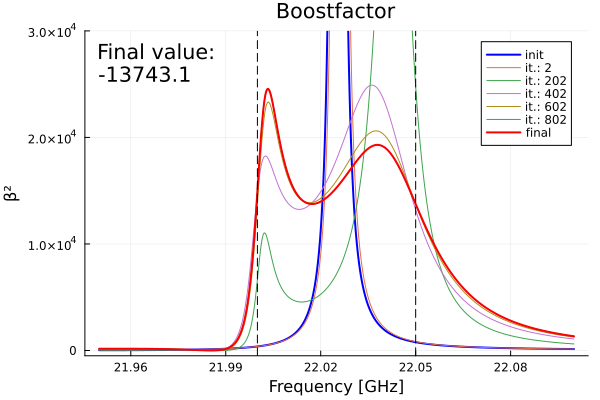

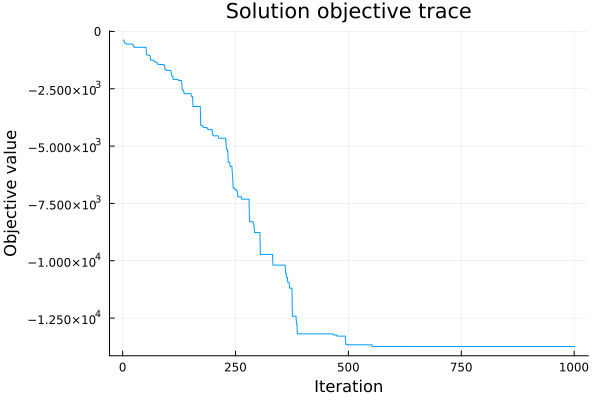

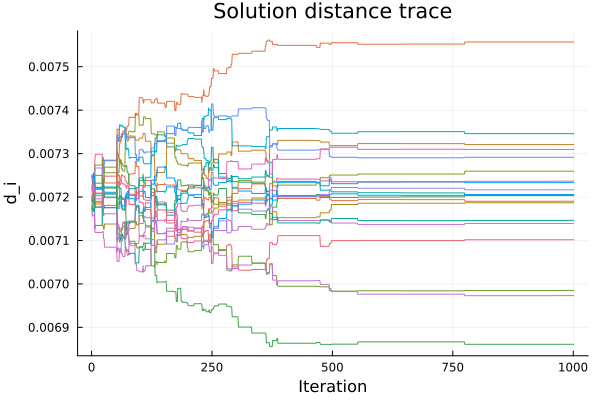

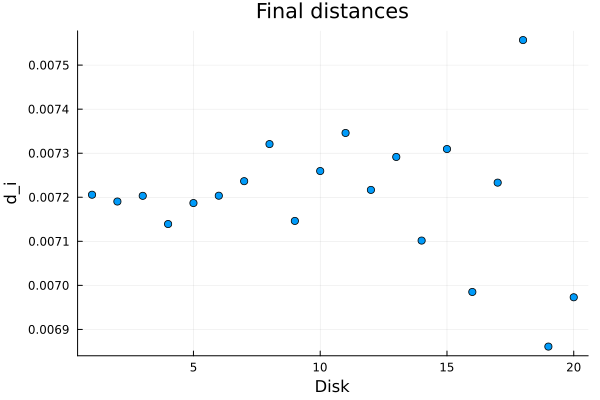

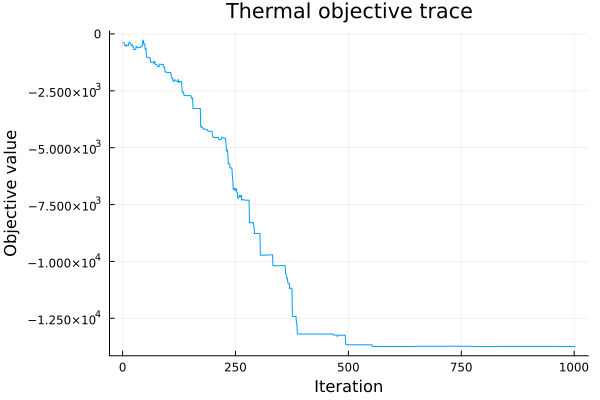

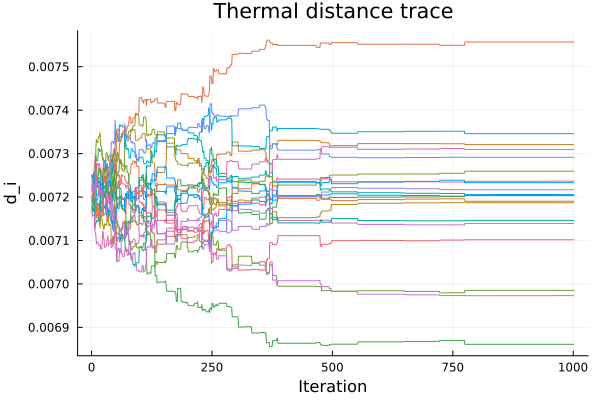

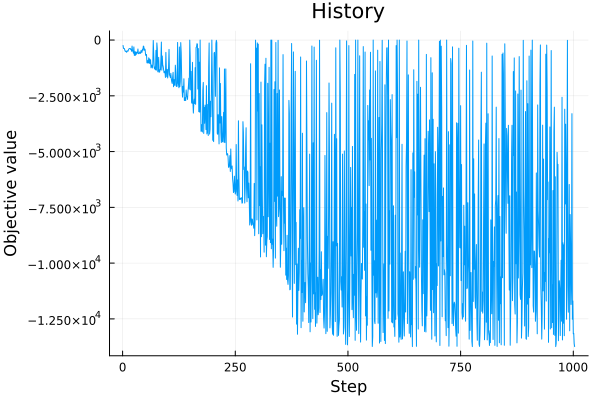

(Plot{Plots.GRBackend() n=8}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1})

In [22]:
analyse(hist,trace[1:end],freqsplot; freqs=freqs,div=5,scale=1e9,ylim=[-0.05e4,3e4])

In [3]:
#number of discs in the booster
n = 20

#initial disc configuration
#findpeak tries to find an equidistant configuration with a peak at f
initdist = findpeak(22.025e9,n)

#generate frequencies for calculation and for plotting
freqs = genFreqs(22.025e9,50e6; length=10) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

#initialize physical properties of the booster
booster = AnalyticalBooster(initdist)
# booster.timestamp = DateTime(0)
#=
Booster(
    pos,              disc positions
    ndisk,            disc number
    thickness,        disc thickness
    epsilon,          disc epsilon
    vmotor,           motor speed
    maxlength,        maximum allowed booster length (not implemented yet)
    timestamp,        booster operation time
    summedtraveltime, summed motor operation time
    codetimestamp     code runtime
)
=#

#initialize storage of measurements
hist = initHist(booster,10000,freqs,ObjAnalytical)
#                           ^ length, should be at least the larger of (n^2, search steps)
;

Objective Value: -243.3, Timestamp: 0000-01-01T00:00:00


### Optimizer

In [4]:
#=
how to use

T = collect(range(100; length=1001,stop=0))

trace = simulatedAnnealing(booster,hist,freqs,
            T,100e-6,
            ObjAnalytical,
            UnstuckDont;
            maxiter=Int(1e6),
            showtrace=true,
            showevery=100,
            unstuckisiter=true,
            traceevery=100,
            resettimer=true)

returns trace, access with
trace[iteration].x      disc position
                .obj    objective value
                .g      gradient
                .h      hessian
                .t      timestamp
                .T      summed travel time
=#

In [5]:
T = collect(range(100; length=1001,stop=0))

trace = simulatedAnnealing(booster,hist,freqs,
            T,100e-6,
            ObjAnalytical,
            UnstuckDont;
            maxiter=Int(1e6),
            showtrace=true,
            showevery=100,
            unstuckisiter=true,
            traceevery=100,
            resettimer=true)
;

UndefVarError: UndefVarError: `obj` not defined

In [ ]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

In [6]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")

GKS: cairoplugin.dll: can't load library, error 126 (0x7e)


(Plot{Plots.GRBackend() n=16}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})